In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../archive.zip', compression='zip')

In [3]:
df.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


In [4]:
df = df.rename(columns={
    'Apartment type': 'Apartment_type',
    'Metro station': 'Metro_station',
    'Minutes to metro':'Minutes_to_metro',
    'Number of rooms': 'Number_of_rooms',
    'Living area': 'Living_area',
    'Kitchen area': 'Kitchen_area',
    'Number of floors': 'Number_of_floors'
})

In [5]:
df.head()

,Price,Apartment_type,Metro_station,Minutes_to_metro,Region,Number_of_rooms,Area,Living_area,Kitchen_area,Floor,Number_of_floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


**1. What are the most common types of apartments in the region?**

In [6]:
df_com_type = df['Apartment_type'].value_counts()

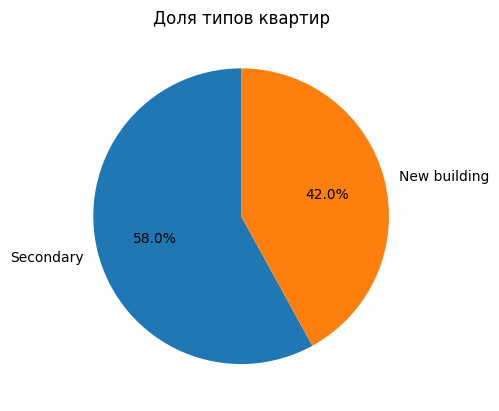

In [7]:
plt.pie(df_com_type, labels=df_com_type.index, autopct='%1.1f%%', startangle=90)
plt.title('Доля типов квартир')
plt.show()

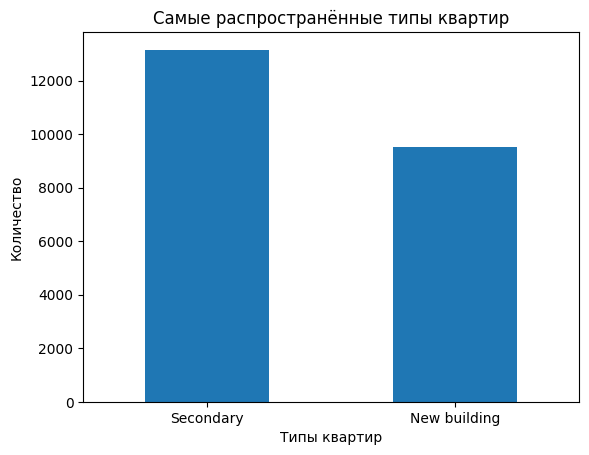

In [8]:
df_com_type.plot(kind='bar')
plt.title('Самые распространённые типы квартир')
plt.ylabel('Количество')
plt.xlabel('Типы квартир')
plt.xticks(rotation=360)
plt.show()

**2. Is there a relationship between housing prices and proximity to metro stations?**

In [9]:
housing_proximity = df.groupby('Minutes_to_metro', as_index=False).Price.sum().sort_values('Price', ascending=False)

In [10]:
housing_proximity.head(5)

,Minutes_to_metro,Price
8,8.0,7.775473e+10
7,7.0,6.944045e+10
6,6.0,6.873925e+10
9,9.0,6.103983e+10
10,10.0,6.095548e+10


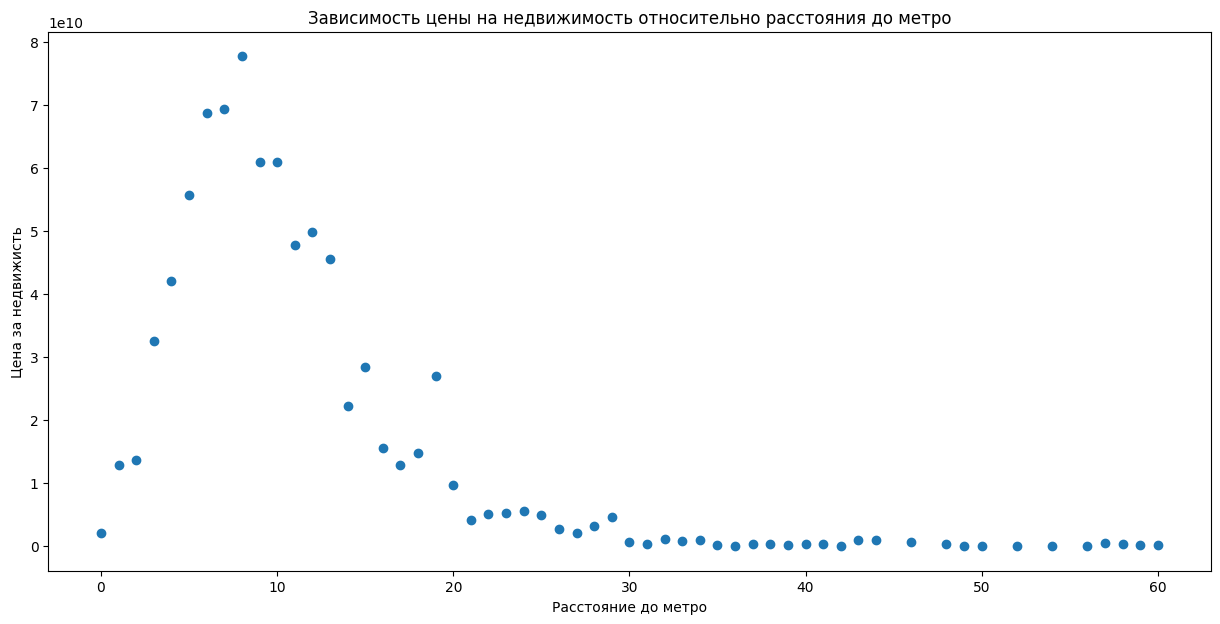

In [21]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(data=housing_proximity, x = 'Minutes_to_metro', y = 'Price')
plt.title('Зависимость цены на недвижимость относительно расстояния до метро')
plt.xlabel('Расстояние до метро')
plt.ylabel('Цена за недвижисть')
plt.show()

**3. How does the level of renovation affect the price of an apartment?**

In [31]:
df_ren = df.groupby('Renovation', as_index=False).Price.mean()

In [33]:
df_ren

,Renovation,Price
0,Cosmetic,9.634695e+06
1,Designer,1.152157e+08
2,European-style renovation,3.450900e+07
3,Without renovation,6.909202e+07


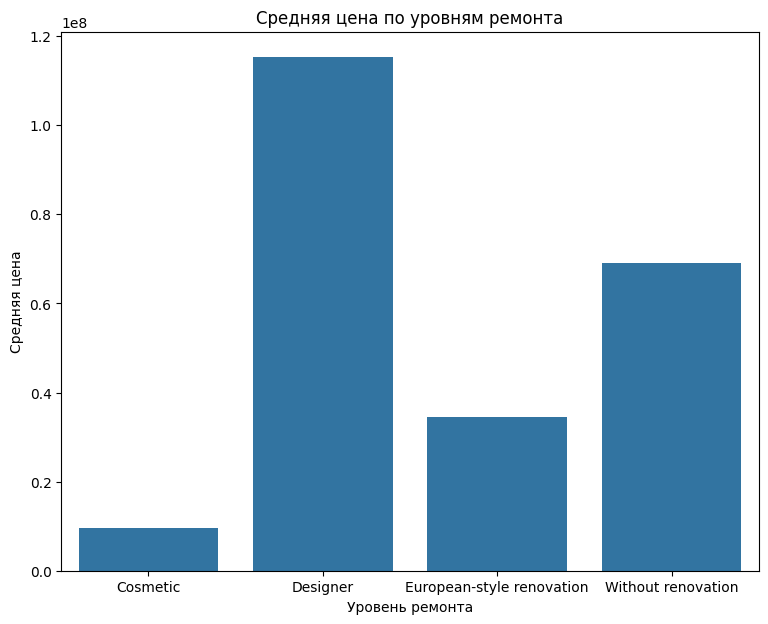

In [62]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.barplot(data=df_ren, x='Renovation', y='Price', ax=ax)
plt.xlabel('Уровень ремонта')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по уровням ремонта')
plt.show()

In [48]:
df_ren_series = df.groupby('Renovation').Price.mean()

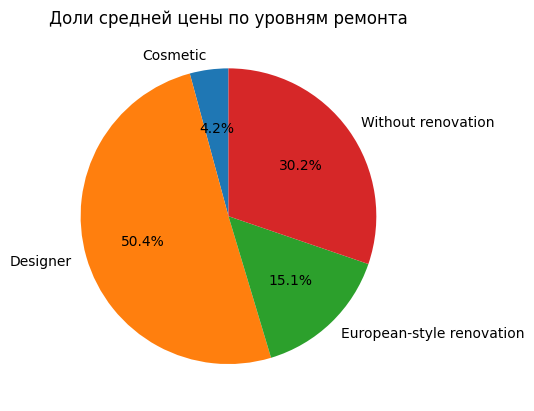

In [50]:
plt.pie(df_ren_series, labels=df_ren_series.index, autopct='%1.1f%%', startangle=90)
plt.title('Доли средней цены по уровням ремонта')
plt.show()

**4. Is there a price difference in housing between Moscow and the Moscow Oblast region?**

In [55]:
df_region = df.groupby('Region', as_index=False).Price.mean()

In [63]:
df_region

,Region,Price
0,Moscow,4.798348e+07
1,Moscow region,6.998220e+06


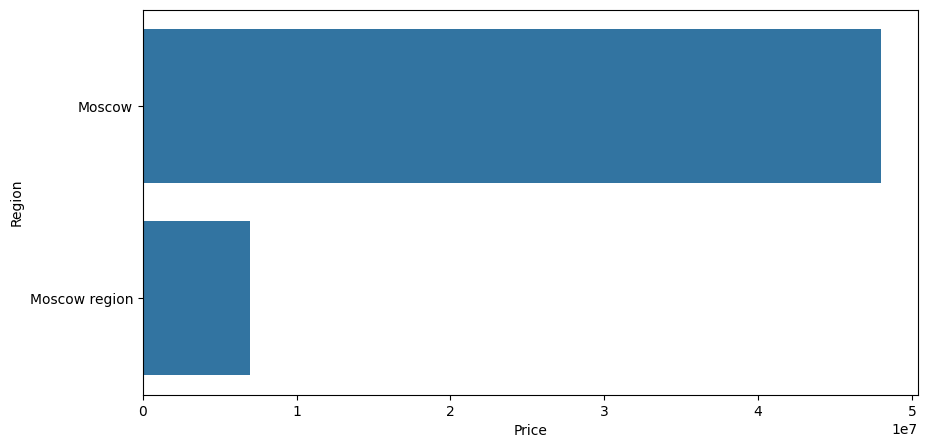

In [67]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_region, x='Price', y='Region')
plt.title('Распределение цены по региону')
plt.show()

In [68]:
df_region_grouped = df.groupby('Region').Price.mean()

In [69]:
df_region_grouped

Region
Moscow           4.798348e+07
Moscow region    6.998220e+06
Name: Price, dtype: float64

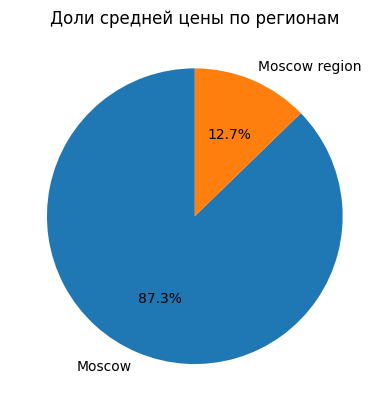

In [71]:
plt.pie(df_region_grouped, labels=df_region_grouped.index, autopct='%1.1f%%', startangle=90)
plt.title('Доли средней цены по регионам')
plt.show()

**5. Are there any preferences regarding floor levels?**

In [78]:
df_floors = df.Number_of_floors.value_counts().reset_index()

In [79]:
df_floors.head()

,Number_of_floors,count
0,20,2893
1,14,2214
2,16,1848
3,17,1829
4,11,1818


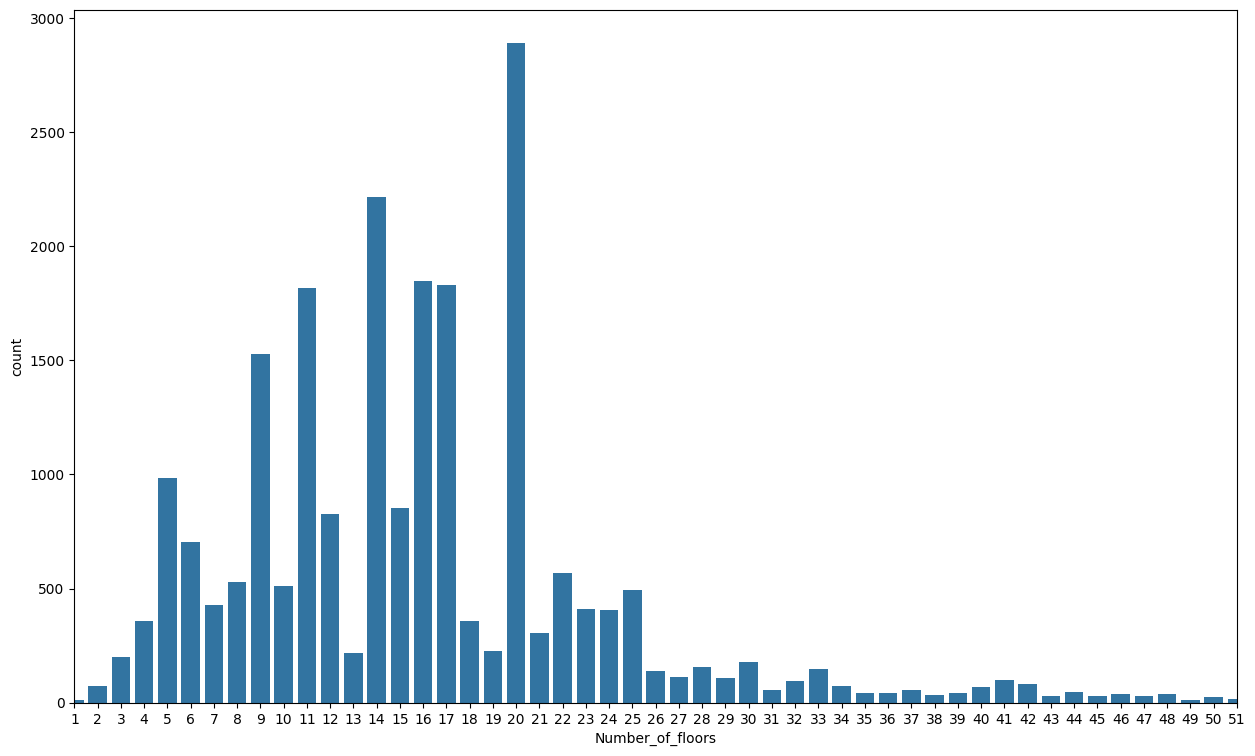

In [86]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.barplot(data=df_floors, x='Number_of_floors', y='count', ax=ax)
ax.set_xlim([0, 50])
plt.show()

**6. Which factors have the greatest impact on housing prices?**